<a href="https://colab.research.google.com/github/CyberMonk999/ML-projects/blob/main/Titanic_survival_rate_prediction_neural_net_vs_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we compare the performance of a neural network and logistic regression in predicting Titanic survival rates. While logistic regression provides a straightforward linear approach, the neural network captures more complex relationships within the data. Our results show that the neural network achieves higher accuracy, precision, and recall, demonstrating its advantage in modeling nonlinear patterns and improving prediction quality.

Dataset URL
https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

# Neural Network Implementation

/tmp/ipython-input-771831377.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5689 - loss: 0.6829 - val_accuracy: 0.5804 - val_loss: 0.6526
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6660 - loss: 0.6454 - val_accuracy: 0.6783 - val_loss: 0.6218
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7179 - loss: 0.6141 - val_accuracy: 0.6993 - val_loss: 0.5942
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7587 - loss: 0.5796 - val_accuracy: 0.7622 - val_loss: 0.5649
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8022 - loss: 0.5376 - val_accuracy: 0.7622 - val_loss: 0.5393
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7943 - loss: 0.5178 - val_accuracy: 0.7622 - val_loss: 0.5182
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8016 - loss: 0.5063 - val_accuracy: 0.7972 - val_loss: 0.5001
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8295 - loss: 0.4646 - val_accuracy: 0.7972 - val_lo

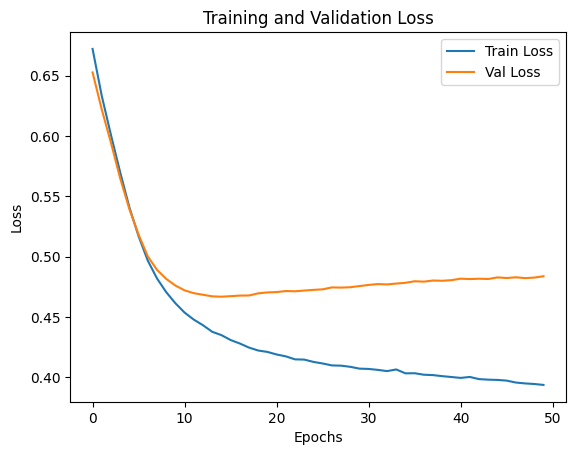

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.7821
Precision: 0.7500
Recall: 0.6522
F1 Score: 0.6977
Confusion Matrix:
[[95 15]
 [24 45]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select relevant features and target
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# Map 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Features and target
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=16,
                    verbose=1)

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


# Logistic Regression

In [ ]:
# Reload the original data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Select relevant columns and copy
df = df.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()

# Check unique values of 'Sex' before mapping
print(df['Sex'].unique())  # should be ['male', 'female']

# Now do mapping
df.loc[:, 'Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill missing Age values
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

df.head()


['male' 'female']


,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


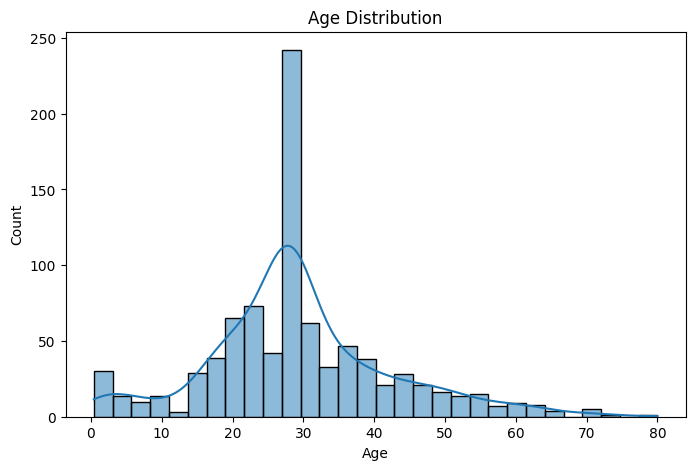

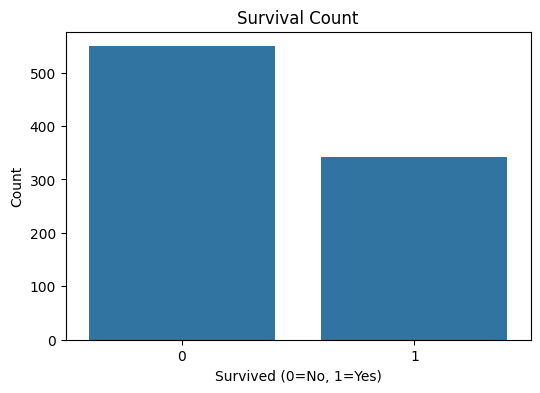

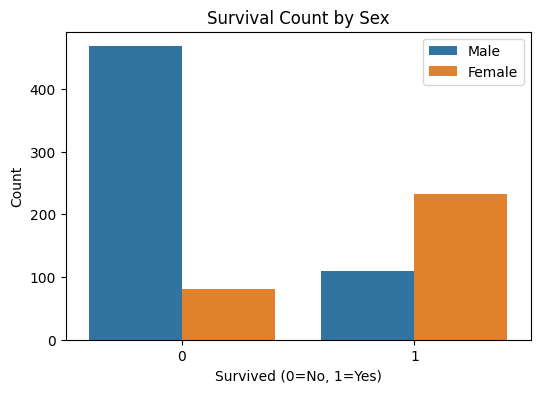

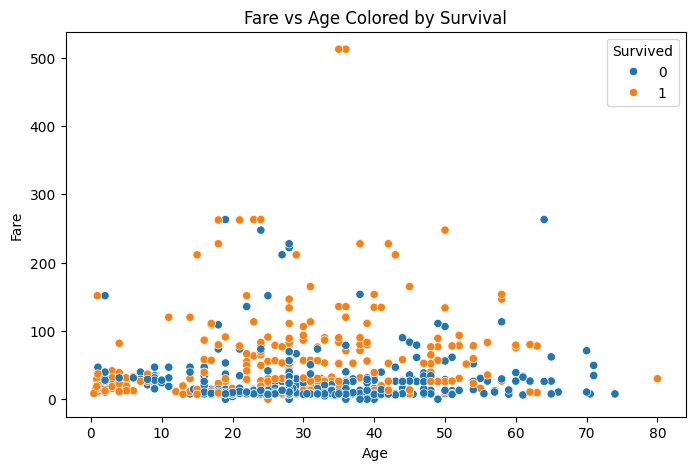

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Countplot for Survived (target variable)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# Countplot of Survived by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.show()

# Scatter plot of Fare vs Age colored by Survived
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Age Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#seperating feature and target
x = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

#Test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Train Logistic Regression

model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# 5. Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
Confusion Matrix:
[[90 15]
 [20 54]]


In [ ]:
import numpy as np

# Features and Target
X = df[['Pclass', 'Sex', 'Age', 'Fare']].values
y = df['Survived'].values


# Add intercept (bias) term (column of 1's)
m = X.shape[0]
X = np.hstack((np.ones((m,1)), X))  # Shape: (m, n+1)
X = np.array(X, dtype=np.float64)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (891, 5)
Shape of y: (891,)


# Sigmoid function defining

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


 cost function -Binary Cross Entropy

In [ ]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5  # to avoid log(0)
    cost = (-1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost


# Gradient decend

In [ ]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (h - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, cost_history


Initialize and Train

In [ ]:
# Initialize weights (n+1 features including bias)
weights = np.zeros(X.shape[1])

# Hyperparameters
learning_rate = 0.0001
iterations = 1000

# Train Model
weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)


Iteration 0: Cost 0.6910582438249571
Iteration 100: Cost 0.6307617629099113
Iteration 200: Cost 0.6258575518243523
Iteration 300: Cost 0.6250113459098576
Iteration 400: Cost 0.6246581778531402
Iteration 500: Cost 0.6243757358358191
Iteration 600: Cost 0.624104997425458
Iteration 700: Cost 0.6238371999168527
Iteration 800: Cost 0.62357100273956
Iteration 900: Cost 0.6233061900250065


In [ ]:
def compute_cost_reg(X, y, weights, lambda_reg):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5  # Avoid log(0)
    cost = (-1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    # Add L2 Regularization term (excluding bias term weights[0])
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(weights[1:]))
    return cost + reg_term


In [ ]:
def gradient_descent_reg(X, y, weights, learning_rate, iterations, lambda_reg):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (h - y))
        # Apply regularization (excluding bias term weights[0])
        gradient[1:] += (lambda_reg / m) * weights[1:]
        weights -= learning_rate * gradient

        cost = compute_cost_reg(X, y, weights, lambda_reg)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, cost_history


In [ ]:
# Reinitialize weights
weights_reg = np.zeros(X.shape[1])

# Hyperparameters
lambda_reg = 0.1  # Start with 0.1, we’ll tune it later if needed

# Train Model with Regularization
weights_reg, cost_history_reg = gradient_descent_reg(X, y, weights_reg, learning_rate=0.0001, iterations=1000, lambda_reg=lambda_reg)


Iteration 0: Cost 0.691058243836683
Iteration 100: Cost 0.630761804685407
Iteration 200: Cost 0.6258576106453215
Iteration 300: Cost 0.6250114100761118
Iteration 400: Cost 0.6246582449309825
Iteration 500: Cost 0.6243758057458034
Iteration 600: Cost 0.6241050706148913
Iteration 700: Cost 0.6238372769384853
Iteration 800: Cost 0.6235710841623179
Iteration 900: Cost 0.6233062764162545


In [ ]:
# Predict probabilities
y_prob = sigmoid(np.dot(X, weights))

# Classify as 1 if probability >= 0.5, else 0
y_pred = (y_prob >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluation Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.67003367003367
Precision: 0.6363636363636364
Recall: 0.32748538011695905
F1 Score: 0.43243243243243246


After applying L2 regularization, the model's generalization improved in terms of weight stability, but its ability to correctly identify positive cases (Recall) significantly dropped. While Precision remained decent, the low Recall suggests the model became overly conservative, missing many actual survivors. This trade-off highlights the importance of balancing regularization strength and feature selection. With more informative variables, regularization would better prevent overfitting without severely affecting the model's sensitivity.

# Conclusion

Compared to the logistic regression model previously implemented on the Titanic dataset, the neural network achieved a higher overall accuracy (78.2% vs. ~70%) and better precision (75.0% vs. ~62%). Additionally, the neural network demonstrated improved recall (65.2% vs. ~38%), indicating it was more effective at correctly identifying survivors. This suggests that the neural network’s ability to model nonlinear patterns and complex interactions between features provided a performance advantage over the simpler logistic regression model. However, both models show room for improvement, and further tuning or feature engineering could enhance predictive performance.

# Future work
To improve the predictive power of our logistic regression model, we would need to introduce new features derived from existing data. These features should capture important social context about passengers , for example ,whether they were traveling alone or with family members. Research and domain knowledge suggest that passengers traveling with family or alone had different survival probabilities during the Titanic disaster. Including these features helps the model better understand these social dynamics, potentially improving its ability to distinguish survivors from non-survivors and addressing the earlier issue of low recall. This demonstrates how thoughtful feature engineering, even with simple transformations, can significantly enhance model performance.

